In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extração

In [11]:
reviews = pd.read_csv("bases/olist_order_reviews_dataset.csv")
items = pd.read_csv("bases/olist_order_items_dataset.csv")
orders= pd.read_csv("bases/olist_orders_dataset.csv")

In [4]:
reviews_df1 = reviews[["review_id", "order_id", "review_score"]]
reviews_df2 = reviews_df1

reviews_df2.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [5]:
items_df1 = items[["order_id", "order_item_id", "product_id"]]
items_df2 = items_df1

items_df2.head()

,order_id,order_item_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089


# Transformação

In [6]:


reviews_df2 = reviews_df2.copy()
reviews_df2["order_id"] = reviews_df2["order_id"].astype(str)


items_df2 = items_df2.copy()
items_df2["order_id"] = items_df2["order_id"].astype(str)

items_reviews1 = reviews_df2.merge(items_df2, on="order_id", how="inner")
items_reviews2 = items_reviews1.loc[:, ["order_id", "product_id", "order_item_id", "review_id", "review_score"]]
items_review = items_reviews2.loc[items_reviews2["order_item_id"] == 1]

items_review_sorted = items_review.sort_values(by=["order_id", "review_id", "product_id", "order_item_id", "review_score"])

items_review_sorted.head()

,order_id,product_id,order_item_id,review_id,review_score
58935,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,97ca439bc427b48bc1cd7177abe71365,5
31587,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,7b07bacd811c4117b742569b04ce3580,4
4791,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,0c5b33dea94867d1ac402749e5438e8b,5
44103,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,f4028d019cb58564807486a6aaf33817,4
63091,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,940144190dcba6351888cafa43f3a3a5,5


In [52]:
items_review_sorted2 = items_review_sorted.sort_values(by=["product_id", "review_score"])

score5 = items_review_sorted2[items_review_sorted2["review_score"] == 5]

score5_count = score5.groupby(["product_id", "review_score"]).size().reset_index()
score5_count.columns = ["product_id","review_score","contagem"]
score5_count_sorted = score5_count.sort_values(by="contagem", ascending=False)

score5_count_sorted.head()

,product_id,review_score,contagem
15229,aca2eb7d00ea1a7b8ebd4e68314663af,5,228
13586,99a4788cb24856965c36a24e339b6058,5,216
5890,422879e10f46682990de24d770e7f83d,5,206
18590,d1c427060a0f73f6b889a5c7c61f2ac4,5,196
7454,53b36df67ebb7c41585e8d54d6772e08,5,187


C:\Users\willi.WILL\AppData\Local\Temp\ipykernel_10368\1711098740.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


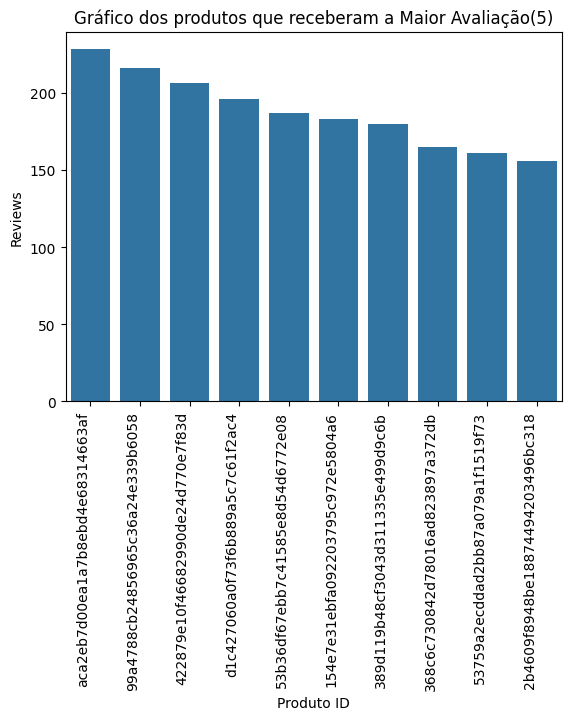

In [53]:
df = pd.DataFrame(score5_count_sorted)

max_bars=10
ax=sns.barplot(x='product_id', y='contagem', data=df.head(max_bars))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.xlabel('Produto ID')
plt.ylabel('Reviews')
plt.title('Gráfico dos produtos que receberam a Maior Avaliação(5)')

# Mostrar o gráfico
plt.show()

In [54]:
items_review_sorted2 = items_review_sorted.sort_values(by=["product_id", "review_score"])

score1 = items_review_sorted2[items_review_sorted2["review_score"] == 1]

score1_count = score1.groupby(["product_id", "review_score"]).size().reset_index()
score1_count.columns = ["product_id","review_score","contagem"]
score1_count_sorted = score1_count.sort_values(by="contagem", ascending=False)

score1_count_sorted.head()

,product_id,review_score,contagem
4062,99a4788cb24856965c36a24e339b6058,1,49
2258,53759a2ecddad2bb87a079a1f1519f73,1,42
1818,422879e10f46682990de24d770e7f83d,1,39
3324,7c1bd920dbdf22470b68bde975dd3ccf,1,36
4599,aca2eb7d00ea1a7b8ebd4e68314663af,1,35


C:\Users\willi.WILL\AppData\Local\Temp\ipykernel_10368\2098313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


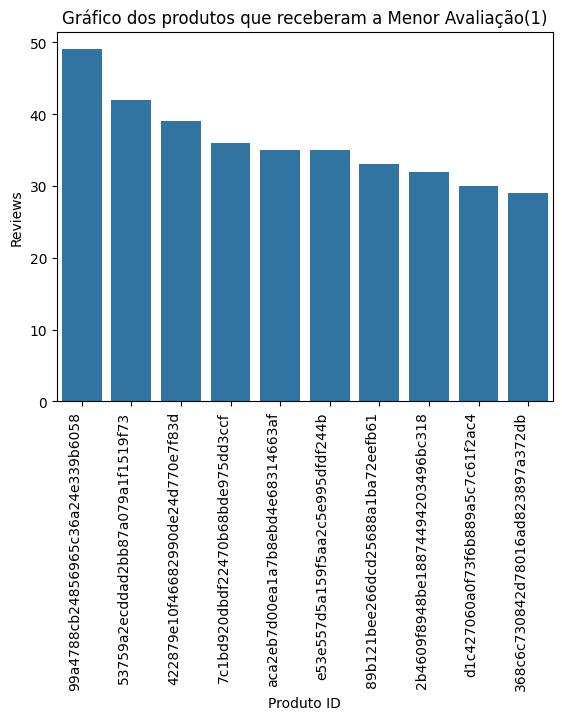

In [55]:
df = pd.DataFrame(score1_count_sorted)

max_bars=10
ax=sns.barplot(x='product_id', y='contagem', data=df.head(max_bars))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.xlabel('Produto ID')
plt.ylabel('Reviews')
plt.title('Gráfico dos produtos que receberam a Menor Avaliação(1)')

# Mostrar o gráfico
plt.show()